In [9]:
import matplotlib.pyplot as plt
import pandas as pd

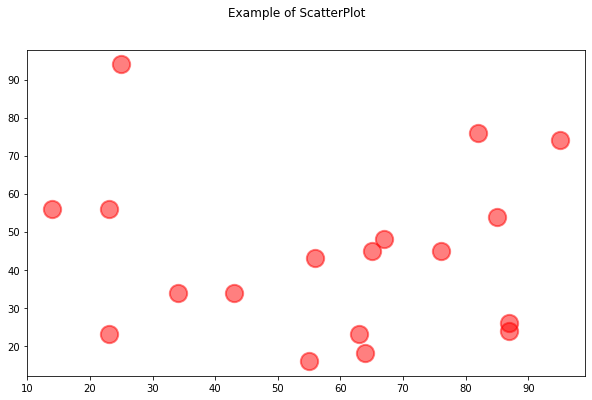

In [10]:
x = [43,76,34,63,56,82,87,55,64,87,95,23,14,65,67,25,23,85]
y = [34,45,34,23,43,76,26,16,18,24,74,23,56,45,48,94,56,54]
fig ,ax = plt.subplots(1, figsize=(10,6))
fig.suptitle('Example of ScatterPlot')
ax.scatter(x,y,color = "red",s = 300,alpha = 0.5,linewidth = 2)

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/ferdinjoe/Jupyter_Data_Visualization/master/kanjanaphisek_bangkok_pm25.csv')
df.head()

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,62.9,1,0
1,2016,3,3,9,62.9,1,0
2,2016,3,3,10,55.5,1,0
3,2016,3,3,11,55.5,1,0
4,2016,3,3,12,47.9,1,0


In [12]:

df.rename(columns={'UTC Hour':'Hour'}, inplace=True)
df['datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']]) + pd.Timedelta(hours=7)
df.index = df['datetime']
df.Hour = df.index.hour
df.drop(columns=['PM10_mask','Retrospective','datetime'],inplace=True)

In [13]:
df[df["PM2.5"] <= 50]

,Year,Month,Day,Hour,PM2.5
datetime,,,,,
2016-03-03 19:00:00,2016,3,3,19,47.9
2016-03-03 20:00:00,2016,3,3,20,43.6
2016-03-03 21:00:00,2016,3,3,21,28.6
2016-03-03 22:00:00,2016,3,3,22,33.6
2016-03-03 23:00:00,2016,3,3,23,34.8
...,...,...,...,...,...
2019-02-07 11:00:00,2019,2,7,11,42.0
2019-02-07 12:00:00,2019,2,7,12,33.0
2019-02-07 13:00:00,2019,2,7,13,37.0


In [14]:
df[(df['PM2.5'] > 50) & (df["PM2.5"] <=100)]["PM2.5"]

datetime
2016-03-03 15:00:00    62.9
2016-03-03 16:00:00    62.9
2016-03-03 17:00:00    55.5
2016-03-03 18:00:00    55.5
2016-03-23 04:00:00    54.2
                       ... 
2019-02-02 23:00:00    51.0
2019-02-03 00:00:00    54.0
2019-02-03 01:00:00    55.0
2019-02-03 12:00:00    51.0
2019-02-04 18:00:00    51.0
Name: PM2.5, Length: 1717, dtype: float64

In [15]:
df[df["PM2.5"]>100]["PM2.5"]

datetime
2017-03-03 09:00:00    115.4
2018-01-22 08:00:00    103.4
2018-01-22 09:00:00    100.8
2018-02-08 10:00:00    114.3
2018-02-14 08:00:00    104.1
                       ...  
2019-01-31 16:00:00    106.0
2019-02-01 02:00:00    104.0
2019-02-01 03:00:00    118.0
2019-02-01 04:00:00    121.0
2019-02-01 05:00:00    103.0
Name: PM2.5, Length: 91, dtype: float64

In [16]:
PM = []
for row in df["PM2.5"]:
    if row <= 50:
        PM.append("Low")
    elif row <= 100:
        PM.append("Med")
    else:
        PM.append("High")


In [17]:
df["PM"] = PM

In [18]:
df

,Year,Month,Day,Hour,PM2.5,PM
datetime,,,,,,
2016-03-03 15:00:00,2016,3,3,15,62.9,Med
2016-03-03 16:00:00,2016,3,3,16,62.9,Med
2016-03-03 17:00:00,2016,3,3,17,55.5,Med
2016-03-03 18:00:00,2016,3,3,18,55.5,Med
2016-03-03 19:00:00,2016,3,3,19,47.9,Low
...,...,...,...,...,...,...
2019-02-07 11:00:00,2019,2,7,11,42.0,Low
2019-02-07 12:00:00,2019,2,7,12,33.0,Low
2019-02-07 13:00:00,2019,2,7,13,37.0,Low


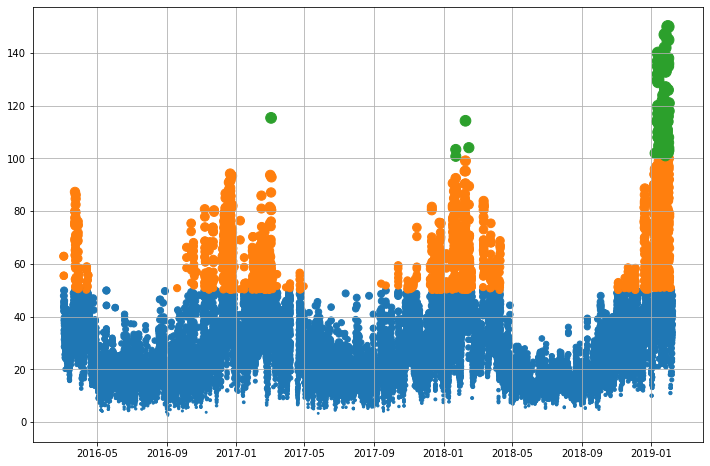

In [19]:

x = df[df["PM"] == "Low"].index
y = df[df["PM"] == "Low"]["PM2.5"]

a = df[df["PM"] == "Med"].index
b = df[df["PM"] == "Med"]["PM2.5"]

c = df[df["PM"] == "High"].index
d = df[df["PM"] == "High"]["PM2.5"]


plt.figure(figsize = (12,8))
plt.grid(True)
plt.scatter(x,y,s = y)
plt.scatter(a,b,s = b)
plt.scatter(c,d,s = d)

In [20]:
print(df[df["PM"] == "High"]["PM"].count())
print(df[df["PM"] == "Med"]["PM"].count())
print(df[df["PM"] == "Low"]["PM"].count())

91
1717
22006


In [21]:
sizes = [91,1717,22006]
label = ["High" , "Med" , "Low"]

Text(0.5, 1.0, 'PM2.5')

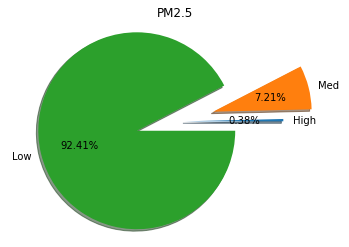

In [22]:
fig, ax = plt.subplots()
explode = (0.1, 0.4, 0.4)
ax.pie(sizes, 
       explode = explode,
       labels = label, shadow=True, autopct='%1.2f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('PM2.5')


In [29]:
df[df["PM"] == "Low"].index

DatetimeIndex(['2016-03-03 19:00:00', '2016-03-03 20:00:00',
               '2016-03-03 21:00:00', '2016-03-03 22:00:00',
               '2016-03-03 23:00:00', '2016-03-04 00:00:00',
               '2016-03-04 02:00:00', '2016-03-04 03:00:00',
               '2016-03-04 04:00:00', '2016-03-04 05:00:00',
               ...
               '2019-02-07 06:00:00', '2019-02-07 07:00:00',
               '2019-02-07 08:00:00', '2019-02-07 09:00:00',
               '2019-02-07 10:00:00', '2019-02-07 11:00:00',
               '2019-02-07 12:00:00', '2019-02-07 13:00:00',
               '2019-02-07 14:00:00', '2019-02-07 15:00:00'],
              dtype='datetime64[ns]', name='datetime', length=22006, freq=None)

In [30]:
df[df["PM"] == "Low"]

,Year,Month,Day,Hour,PM2.5,PM
datetime,,,,,,
2016-03-03 19:00:00,2016,3,3,19,47.9,Low
2016-03-03 20:00:00,2016,3,3,20,43.6,Low
2016-03-03 21:00:00,2016,3,3,21,28.6,Low
2016-03-03 22:00:00,2016,3,3,22,33.6,Low
2016-03-03 23:00:00,2016,3,3,23,34.8,Low
...,...,...,...,...,...,...
2019-02-07 11:00:00,2019,2,7,11,42.0,Low
2019-02-07 12:00:00,2019,2,7,12,33.0,Low
2019-02-07 13:00:00,2019,2,7,13,37.0,Low
